In [1]:
It is supervised machine learning algorithm which is used for classification as well as regression

KNN is distance based algorithm
Distance :n_neighbors=5 default
    1. Euclidean Distance (p=2) >> sklearn default p=2
    2. Manhattan Distance (p=1)
    
KNN is non parametric algorithm
non parametric >> No assumption on distribution of data

SyntaxError: invalid syntax (<ipython-input-1-45374507f48c>, line 1)

In [2]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [ ]:
KNeighborsClassifier()

# Steps for classification

In [ ]:
1) Load the data
2) Select the k values and p values
3) Calculate the distance between test point with all training points
4) Sorting > ascending order
5) Pick the first K entries from sorted collection
6) classfication >> using voting classifier


# Steps for Regression

In [ ]:
1) Load the data
2) Select the k values and p values
3) Calculate the distance between test point with all training points
4) Sorting > ascending order
5) Pick the first K entries from sorted collection
6) return the mean of the k label

# Feature Scaling

In [ ]:
1. Normalization >> MinMaxScalar
>> range 0-1
2.Standardization (-3 t0 +3)
>> StandardScalar
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
 cm    feet m
 183    6   2

In [ ]:
Distance Based Algorithm ( Scaling is required)
1) KNN
2) K-Means Clustering
3) PCA

Gradient Descent Based Algorithm ( Scaling is optional)
1) Linear Regression
2) Logistic Regression
3) Lasso (L1)
4) Ridge (L2)

Tree Based Algorithms ( Scaling is not required)
1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boost
5. XGBoost

In [ ]:
1. Normalization >> MinMaxScalar
>> range 0-1

Formula >
Xnew = (Xi - Xmin)/(Xmax - Xmin)
If the data is not normally distributed




2.Standardization (-3 t0 +3)
>> StandardScalar
Xnew = (Xi - Xmean) /Xstd
z_score
If the data is normally distributed

from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Advantages

In [ ]:
1. The Algorithm is simple and easy to implement
2. non parametric
3. Used for both classification and regression
4. Work with any number of classess
5. Efficient method for small datasets

# DisAdvantages

In [ ]:
1. Computional cost is high because of calculating the distances between test data point with all training data points
2. Data Scaling is required
3. Sensitive to outliers
4. Always need to determine p&k values using GridSearchcV and RandomizeSearchCv
5. Does not work as expected when we are working with big number of features/ Parameters
   1. Feature selection
   2. PCA

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r'D:\PYTHON_NOTES\CSV\diabetes.csv')

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1) EDA

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

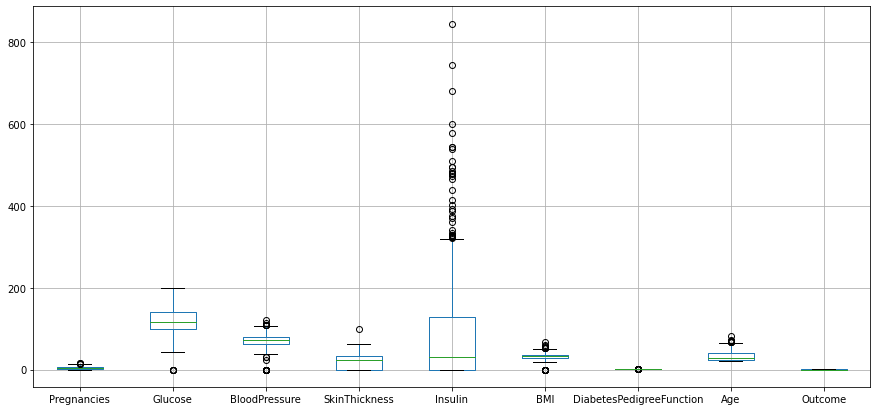

In [12]:
plt.figure(figsize=(15,7))
df.boxplot()

### observation

 From above boxplot visulaization we saw the utlier present in 'insuline' columns

In [13]:
df[['Pregnancies']].value_counts()

Pregnancies
1              135
0              111
2              103
3               75
4               68
5               57
6               50
7               45
8               38
9               28
10              24
11              11
13              10
12               9
14               2
15               1
17               1
dtype: int64

In [14]:
df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [15]:
df['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [16]:
df['DiabetesPedigreeFunction'].nunique()

517

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
df.shape

(768, 9)

# Feature Engineering

Handling outlier present in features 'insuline' 

In [20]:
# Q1=np.quantile(df['Insulin'],0.25) # we not taking lower tail value because their is no outlier in lower tail
Q3=np.quantile(df['Insulin'],0.75)
IQR = Q3
uppertail=Q3+1.5*IQR
# lowertail=Q1-1.5*IQR
df.loc[df['Insulin']>uppertail] # we detect outlier in uppertail

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


#### we will impute outlier

In [135]:
df.loc[~(df['Insulin']>uppertail)] # without outlier

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [136]:
mean_value=df['Insulin'].loc[~(df['Insulin']>uppertail)].mean()

In [137]:
df.loc[(df['Insulin']>uppertail)]=mean_value

<AxesSubplot:xlabel='Insulin'>

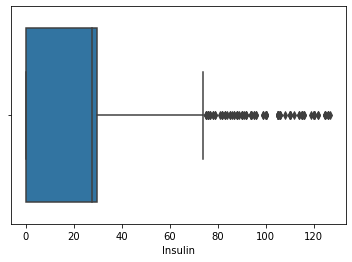

In [139]:
sns.boxplot(df['Insulin'])

### Observation

 we removed outlier, Intially the value of outlier between range of approximate 360 to 820

# model Training`

In [8]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [9]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=40,stratify=y)


In [10]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

# Evalution

# training

In [11]:
y_pred_train =knn_clf.predict(x_train)
cnf_metric =confusion_matrix(y_train,y_pred_train)
print(cnf_metric)

accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)
clf_report =classification_report(y_train,y_pred_train)
print(clf_report)

[[341  34]
 [ 74 127]]
0.8125
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       375
           1       0.79      0.63      0.70       201

    accuracy                           0.81       576
   macro avg       0.81      0.77      0.78       576
weighted avg       0.81      0.81      0.81       576



# Testing

In [12]:
y_pred_test =knn_clf.predict(x_test)
cnf_metric =confusion_matrix(y_test,y_pred_test)
print(cnf_metric)

accuracy=accuracy_score(y_test,y_pred_test)
print(accuracy)
clf_report =classification_report(y_test,y_pred_test)
print(clf_report)

[[100  25]
 [ 30  37]]
0.7135416666666666
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       125
           1       0.60      0.55      0.57        67

    accuracy                           0.71       192
   macro avg       0.68      0.68      0.68       192
weighted avg       0.71      0.71      0.71       192



# hypertunning

# 1)GridSearchCv

In [13]:
knn_clf =KNeighborsClassifier()
hyper= {'n_neighbors':np.arange(3,20),
       'p':[1,2]}
gscv = GridSearchCV(knn_clf,hyper,cv=5)
gscv.fit(x_train,y_train)
gscv.best_estimator_


KNeighborsClassifier(n_neighbors=14, p=1)

In [ ]:
hyper = {"n_estimator": np.arange(3,10),}

In [14]:
gscv.best_params_

{'n_neighbors': 14, 'p': 1}

In [15]:
knn_clf=KNeighborsClassifier(n_neighbors=14)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [16]:
# again training

y_pred_train =knn_clf.predict(x_train)
cnf_metric =confusion_matrix(y_train,y_pred_train)
print(cnf_metric)

accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)
clf_report =classification_report(y_train,y_pred_train)
print(clf_report)

[[353  22]
 [ 98 103]]
0.7916666666666666
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       375
           1       0.82      0.51      0.63       201

    accuracy                           0.79       576
   macro avg       0.80      0.73      0.74       576
weighted avg       0.80      0.79      0.78       576



In [17]:
# again_testing
y_pred_test =knn_clf.predict(x_test)
cnf_metric =confusion_matrix(y_test,y_pred_test)
print(cnf_metric)

accuracy=accuracy_score(y_test,y_pred_test)
print(accuracy)
clf_report =classification_report(y_test,y_pred_test)
print(clf_report)

[[108  17]
 [ 31  36]]
0.75
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.68      0.54      0.60        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



# randomized cv

In [18]:
knn_clf= KNeighborsClassifier()
random_hyper = {'n_neighbors':np.arange(3,20),
               'p':[1,2]}
rmsc= RandomizedSearchCV(knn_clf,random_hyper,cv=5)
rmsc.fit(x_train,y_train)
rmsc.best_estimator_

KNeighborsClassifier(n_neighbors=14, p=1)

In [19]:
rmsc.best_params_

{'p': 1, 'n_neighbors': 14}

In [70]:
knn_clf=KNeighborsClassifier(n_neighbors=14)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [71]:
# again training

y_pred_train =knn_clf.predict(x_train)
cnf_metric =confusion_matrix(y_train,y_pred_train)
print(cnf_metric)

accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)
clf_report =classification_report(y_train,y_pred_train)
print(clf_report)

[[353  22]
 [ 98 103]]
0.7916666666666666
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       375
           1       0.82      0.51      0.63       201

    accuracy                           0.79       576
   macro avg       0.80      0.73      0.74       576
weighted avg       0.80      0.79      0.78       576



In [72]:
# testing
y_pred_test =knn_clf.predict(x_test)
cnf_metric =confusion_matrix(y_test,y_pred_test)
print(cnf_metric)

accuracy=accuracy_score(y_test,y_pred_test)
print(accuracy)
clf_report =classification_report(y_test,y_pred_test)
print(clf_report)

[[108  17]
 [ 31  36]]
0.75
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.68      0.54      0.60        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



# feature scaling

In [75]:
x_df =df.drop("Outcome",axis=1)
y =df['Outcome']

# 1.normalization

In [81]:
normal = MinMaxScaler()
array =normal.fit_transform(x_df)
x_normal_df =pd.DataFrame(array,columns=x_df.columns)

In [83]:
x=x_normal_df.copy()
y=df['Outcome']

In [88]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=40,stratify=y)

# GridSearchCV

In [90]:
knn_clf=KNeighborsClassifier()
hyper_gscv={'n_neighbors':np.arange(3,20),
           'p':[1,2]}
final_grid = GridSearchCV(knn_clf,hyper_gscv,cv=5)
final_grid.fit(x_train,y_train)
final_grid.best_params_


{'n_neighbors': 5, 'p': 1}

In [95]:
knn_clf=KNeighborsClassifier(n_neighbors=14)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [96]:
# again training

y_pred_train =knn_clf.predict(x_train)
cnf_metric =confusion_matrix(y_train,y_pred_train)
print(cnf_metric)

accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)
clf_report =classification_report(y_train,y_pred_train)
print(clf_report)

[[347  28]
 [100 101]]
0.7777777777777778
              precision    recall  f1-score   support

           0       0.78      0.93      0.84       375
           1       0.78      0.50      0.61       201

    accuracy                           0.78       576
   macro avg       0.78      0.71      0.73       576
weighted avg       0.78      0.78      0.76       576



In [97]:
# testing
y_pred_test =knn_clf.predict(x_test)
cnf_metric =confusion_matrix(y_test,y_pred_test)
print(cnf_metric)

accuracy=accuracy_score(y_test,y_pred_test)
print(accuracy)
clf_report =classification_report(y_test,y_pred_test)
print(clf_report)

[[108  17]
 [ 38  29]]
0.7135416666666666
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       125
           1       0.63      0.43      0.51        67

    accuracy                           0.71       192
   macro avg       0.69      0.65      0.66       192
weighted avg       0.70      0.71      0.70       192



# RandomizedSearchCV

In [98]:
knn_clf=KNeighborsClassifier(n_neighbors=12)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [99]:
# again training

y_pred_train =knn_clf.predict(x_train)
cnf_metric =confusion_matrix(y_train,y_pred_train)
print(cnf_metric)

accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)
clf_report =classification_report(y_train,y_pred_train)
print(clf_report)

[[347  28]
 [102  99]]
0.7743055555555556
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       375
           1       0.78      0.49      0.60       201

    accuracy                           0.77       576
   macro avg       0.78      0.71      0.72       576
weighted avg       0.78      0.77      0.76       576



In [100]:
# testing
y_pred_test =knn_clf.predict(x_test)
cnf_metric =confusion_matrix(y_test,y_pred_test)
print(cnf_metric)

accuracy=accuracy_score(y_test,y_pred_test)
print(accuracy)
clf_report =classification_report(y_test,y_pred_test)
print(clf_report)

[[104  21]
 [ 38  29]]
0.6927083333333334
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       125
           1       0.58      0.43      0.50        67

    accuracy                           0.69       192
   macro avg       0.66      0.63      0.64       192
weighted avg       0.68      0.69      0.68       192



# StandardScaler

In [101]:
stand_scale=StandardScaler()
array =stand_scale.fit_transform(x_df)
x_std_df=pd.DataFrame(array,columns=x_df.columns)

In [103]:
x=x_std_df.copy()
y=df['Outcome']

### GridSearchCV

In [104]:
knn_clf=KNeighborsClassifier(n_neighbors=14)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [105]:
# again training

y_pred_train =knn_clf.predict(x_train)
cnf_metric =confusion_matrix(y_train,y_pred_train)
print(cnf_metric)

accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)
clf_report =classification_report(y_train,y_pred_train)
print(clf_report)

[[347  28]
 [100 101]]
0.7777777777777778
              precision    recall  f1-score   support

           0       0.78      0.93      0.84       375
           1       0.78      0.50      0.61       201

    accuracy                           0.78       576
   macro avg       0.78      0.71      0.73       576
weighted avg       0.78      0.78      0.76       576



In [106]:
# testing
y_pred_test =knn_clf.predict(x_test)
cnf_metric =confusion_matrix(y_test,y_pred_test)
print(cnf_metric)

accuracy=accuracy_score(y_test,y_pred_test)
print(accuracy)
clf_report =classification_report(y_test,y_pred_test)
print(clf_report)

[[108  17]
 [ 38  29]]
0.7135416666666666
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       125
           1       0.63      0.43      0.51        67

    accuracy                           0.71       192
   macro avg       0.69      0.65      0.66       192
weighted avg       0.70      0.71      0.70       192



# RandomizedSearchCV

In [107]:
knn_clf=KNeighborsClassifier(n_neighbors=12)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [108]:
# again training

y_pred_train =knn_clf.predict(x_train)
cnf_metric =confusion_matrix(y_train,y_pred_train)
print(cnf_metric)

accuracy=accuracy_score(y_train,y_pred_train)
print(accuracy)
clf_report =classification_report(y_train,y_pred_train)
print(clf_report)

[[347  28]
 [102  99]]
0.7743055555555556
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       375
           1       0.78      0.49      0.60       201

    accuracy                           0.77       576
   macro avg       0.78      0.71      0.72       576
weighted avg       0.78      0.77      0.76       576



In [109]:
# testing
y_pred_test =knn_clf.predict(x_test)
cnf_metric =confusion_matrix(y_test,y_pred_test)
print(cnf_metric)

accuracy=accuracy_score(y_test,y_pred_test)
print(accuracy)
clf_report =classification_report(y_test,y_pred_test)
print(clf_report)

[[104  21]
 [ 38  29]]
0.6927083333333334
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       125
           1       0.58      0.43      0.50        67

    accuracy                           0.69       192
   macro avg       0.66      0.63      0.64       192
weighted avg       0.68      0.69      0.68       192



# KNN Regression

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import json
import warnings
warnings.filterwarnings("ignore")

In [28]:
from sklearn import datasets

# Data gathering

In [29]:
d=datasets.load_boston()
df =pd.DataFrame(d.data,columns=d.feature_names)
df["PRICE"] = d.target

In [30]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
df.isna().mean()*100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
PRICE      0.0
dtype: float64

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.shape

(506, 14)

In [11]:
df['CRIM'].nunique()

504

<AxesSubplot:>

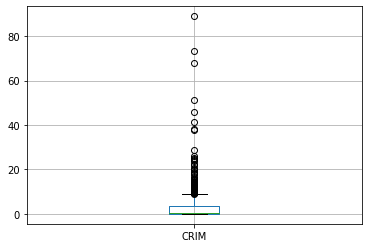

In [12]:
df[['CRIM']].boxplot()

<AxesSubplot:xlabel='CRIM'>

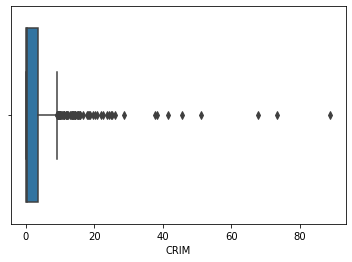

In [13]:
sns.boxplot(df['CRIM'])

# model Training and model selection

In [14]:
x =df.drop('PRICE',axis=1)
y =df['PRICE']
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [15]:
knn_reg =LinearRegression() # k=5,p=2(E.D)
knn_reg.fit(x_train,y_train)

LinearRegression()

In [16]:
with open('knn_model.pkl','wb') as file:
    pickle.dump(knn_reg,file)

# evalution

In [17]:
#Testing
y_pred_test =knn_reg.predict(x_test)
MSE =mean_squared_error(y_test,y_pred_test)
print(MSE)
MAE =mean_absolute_error(y_test,y_pred_test)
print(MAE)
R2_score =r2_score(y_test,y_pred_test)
print(R2_score)


27.949660331548877
3.8872075852609203
0.7413935597999859


In [18]:
#training
y_pred_train =knn_reg.predict(x_train)
MSE =mean_squared_error(y_train,y_pred_train)
print(MSE)
MAE =mean_absolute_error(y_train,y_pred_train)
print(MAE)
R2_score =r2_score(y_train,y_pred_train)
print(R2_score)


20.469951521916812
3.1219754307850685
0.7387038327766107


# using Linear_regression

In [19]:
knn_reg =LinearRegression() # k=5,p=2(E.D)
knn_reg.fit(x_train,y_train)

LinearRegression()

In [20]:
with open('knn_.pkl','wb') as file:
    pickle.dump(knn_reg,file)

In [21]:
#Testing
y_pred_test =knn_reg.predict(x_test)
MSE =mean_squared_error(y_test,y_pred_test)
print(MSE)
MAE =mean_absolute_error(y_test,y_pred_test)
print(MAE)
R2_score =r2_score(y_test,y_pred_test)
print(R2_score)


27.949660331548877
3.8872075852609203
0.7413935597999859


In [22]:
#training
y_pred_train =knn_reg.predict(x_train)
MSE =mean_squared_error(y_train,y_pred_train)
print(MSE)
MAE =mean_absolute_error(y_train,y_pred_train)
print(MAE)
R2_score =r2_score(y_train,y_pred_train)
print(R2_score)


20.469951521916812
3.1219754307850685
0.7387038327766107


# using hyperparameter tunning

In [23]:
p=2,& k=?
p=1,& k=?


SyntaxError: invalid syntax (<ipython-input-23-2aa85cd8b676>, line 1)

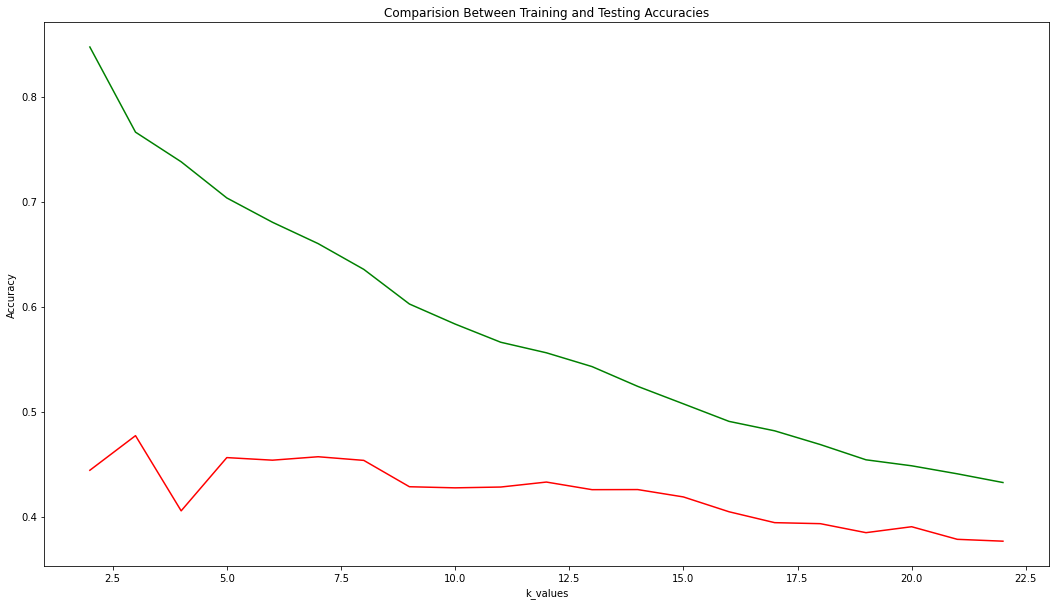

In [25]:
r2_train_list=[]
r2_test_list=[]
k_values=range(2,23)
for k in k_values:
    knn_reg =KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    
    # training part in hyperparamater tunning
    r2_train =knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    # testing part in hyperparamater tunning
    r2_test =knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(18,10))
plt.plot(k_values,r2_train_list,color='green')
plt.plot(k_values,r2_test_list,color='red')
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparision Between Training and Testing Accuracies")
plt.show()

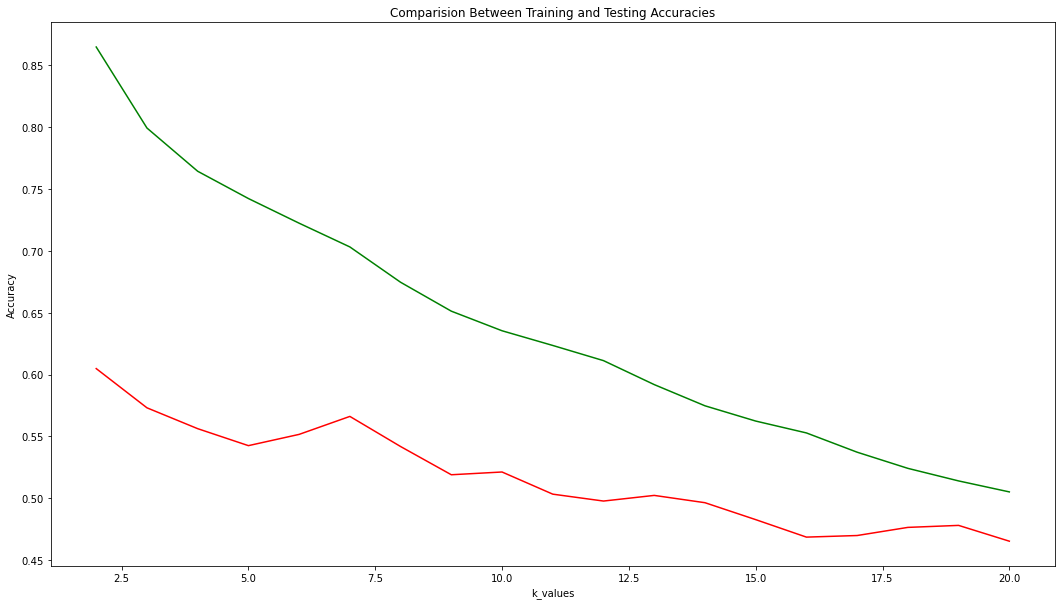

In [26]:
r2_train_list=[]
r2_test_list=[]
k_values=range(2,21)
for k in k_values:
    knn_reg =KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    
    # training part in hyperparamater tunning
    r2_train =knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    # testing part in hyperparamater tunning
    r2_test =knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(18,10))
plt.plot(k_values,r2_train_list,color='green')
plt.plot(k_values,r2_test_list,color='red')
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparision Between Training and Testing Accuracies")
plt.show()

In [25]:
K=2,p=1

SyntaxError: cannot assign to literal (<ipython-input-25-714b9fff4f61>, line 1)

In [26]:
knn_reg=KNeighborsRegressor(n_neighbors=2,p=1)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [27]:
#training
y_pred_train =knn_reg.predict(x_train)
MSE =mean_squared_error(y_train,y_pred_train)
print(MSE)
MAE =mean_absolute_error(y_train,y_pred_train)
print(MAE)
R2_score =r2_score(y_train,y_pred_train)
print(R2_score)


10.59819306930693
2.065841584158416
0.86471549649063


In [28]:
#Testing
y_pred_test =knn_reg.predict(x_test)
MSE =mean_squared_error(y_test,y_pred_test)
print(MSE)
MAE =mean_absolute_error(y_test,y_pred_test)
print(MAE)
R2_score =r2_score(y_test,y_pred_test)
print(R2_score)


42.70938725490196
4.6495098039215685
0.6048280204447845


# feature Engineering

In [29]:
x=df.drop('PRICE',axis=1)
y=df['PRICE']

# Normalization

In [30]:
normal=MinMaxScaler()
array =normal.fit_transform(x)
normal_df=pd.DataFrame(array,columns=x.columns)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(normal_df,y,test_size=0.25,random_state=45)

In [32]:
knn_reg=KNeighborsRegressor(n_neighbors=2,p=1) # ED>k=5,p=2
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [33]:
#training
y_pred_train =knn_reg.predict(x_train)
MSE =mean_squared_error(y_train,y_pred_train)
print(MSE)
MAE =mean_absolute_error(y_train,y_pred_train)
print(MAE)
R2_score =r2_score(y_train,y_pred_train)
print(R2_score)

5.554221635883906
1.579683377308707
0.9294556123427848


In [34]:
#Testing
y_pred_test =knn_reg.predict(x_test)
MSE =mean_squared_error(y_test,y_pred_test)
print(MSE)
MAE =mean_absolute_error(y_test,y_pred_test)
print(MAE)
R2_score =r2_score(y_test,y_pred_test)
print(R2_score)

18.813503937007873
3.082677165354331
0.8143289054993172


# finding k and p values after scaling

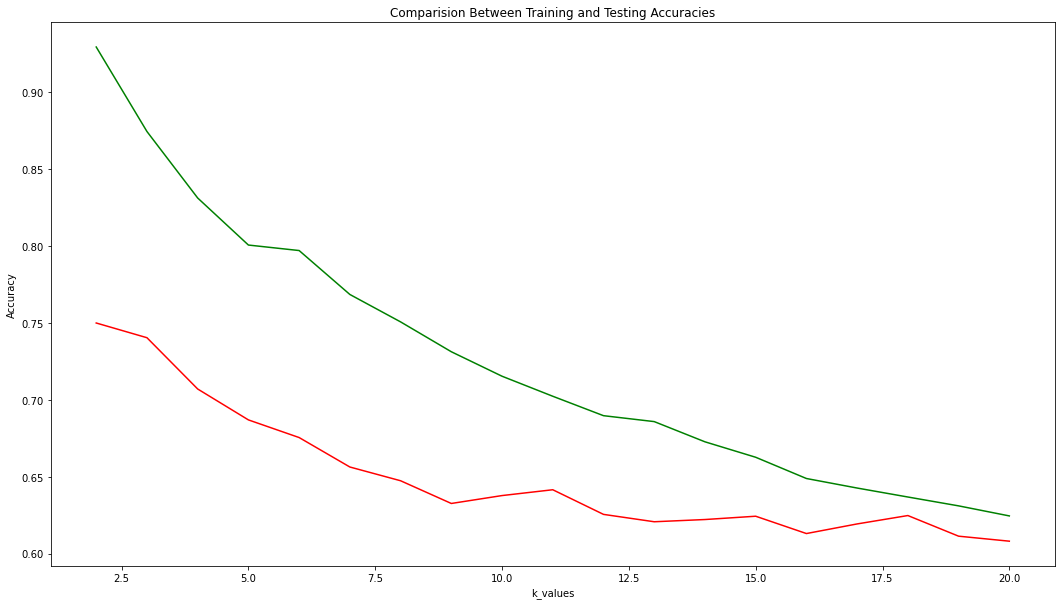

In [35]:
p=2
r2_train_list=[]
r2_test_list=[]
k_values=range(2,21)
for k in k_values:
    knn_reg =KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    
    # training part in hyperparamater tunning
    r2_train =knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    # testing part in hyperparamater tunning
    r2_test =knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(18,10))
plt.plot(k_values,r2_train_list,color='green')
plt.plot(k_values,r2_test_list,color='red')
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparision Between Training and Testing Accuracies")
plt.show()

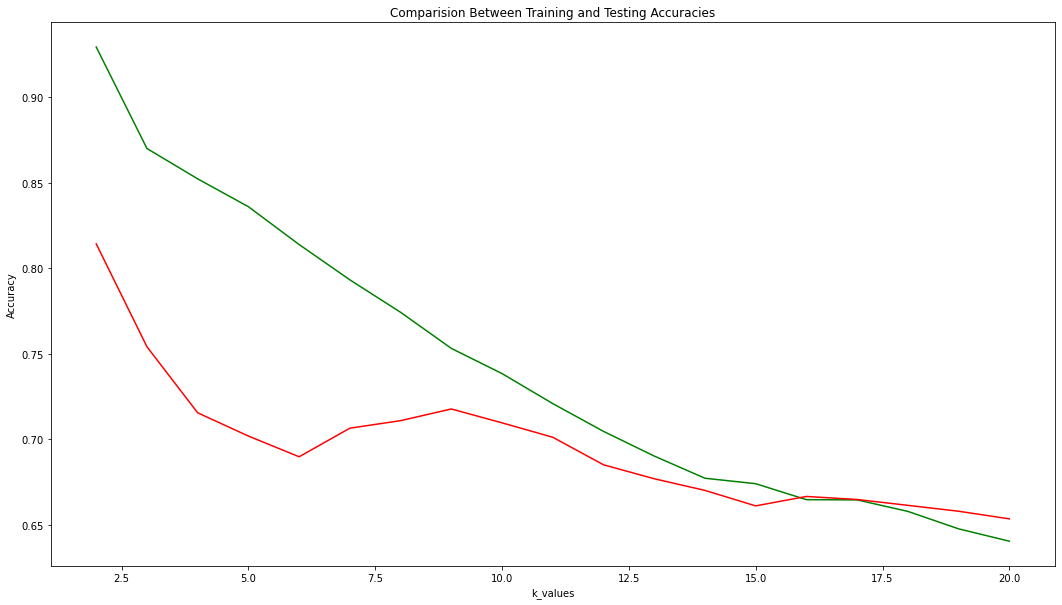

In [36]:
# p=1
r2_train_list=[]
r2_test_list=[]
k_values=range(2,21)
for k in k_values:
    knn_reg =KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    
    # training part in hyperparamater tunning
    r2_train =knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    # testing part in hyperparamater tunning
    r2_test =knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(18,10))
plt.plot(k_values,r2_train_list,color='green')
plt.plot(k_values,r2_test_list,color='red')
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparision Between Training and Testing Accuracies")
plt.show()

# 2)Standardization

In [37]:
std_scalar=StandardScaler()
array=std_scalar.fit_transform(x)
std_df=pd.DataFrame(array,columns=x.columns)

In [38]:
# without scaling and without hyperparamtere
# with hyperparameter but without scaling
# both

In [39]:
x_train,x_test,y_train,y_test=train_test_split(normal_df,y,test_size=0.25,random_state=45)

In [40]:
knn_reg=KNeighborsRegressor(n_neighbors=2,p=1) # ED>k=5,p=2
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [1]:
#training
y_pred_train =knn_reg.predict(x_train)
MSE =mean_squared_error(y_train,y_pred_train)
print(MSE)
MAE =mean_absolute_error(y_train,y_pred_train)
print(MAE)
R2_score =r2_score(y_train,y_pred_train)
print(R2_score)

NameError: name 'knn_reg' is not defined

In [42]:
#Testing
y_pred_test =knn_reg.predict(x_test)
MSE =mean_squared_error(y_test,y_pred_test)
print(MSE)
MAE =mean_absolute_error(y_test,y_pred_test)
print(MAE)
R2_score =r2_score(y_test,y_pred_test)
print(R2_score)

18.813503937007873
3.082677165354331
0.8143289054993172


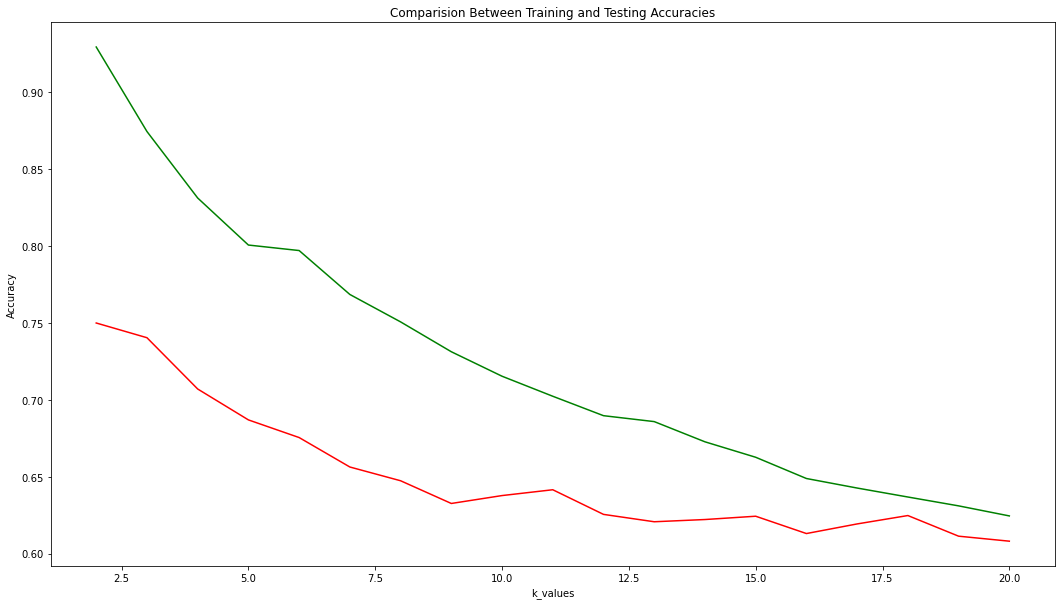

In [43]:
p=2
r2_train_list=[]
r2_test_list=[]
k_values=range(2,21)
for k in k_values:
    knn_reg =KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    
    # training part in hyperparamater tunning
    r2_train =knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    # testing part in hyperparamater tunning
    r2_test =knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(18,10))
plt.plot(k_values,r2_train_list,color='green')
plt.plot(k_values,r2_test_list,color='red')
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparision Between Training and Testing Accuracies")
plt.show()

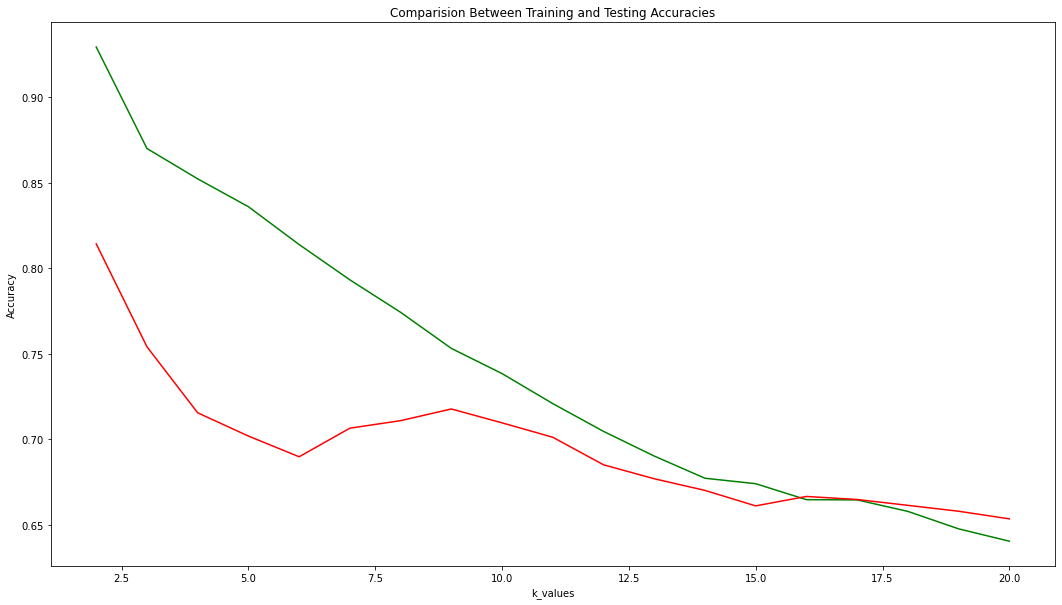

In [44]:
p=2
r2_train_list=[]
r2_test_list=[]
k_values=range(2,21)
for k in k_values:
    knn_reg =KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
    
    # training part in hyperparamater tunning
    r2_train =knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    # testing part in hyperparamater tunning
    r2_test =knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
#     break
plt.figure(figsize=(18,10))
plt.plot(k_values,r2_train_list,color='green')
plt.plot(k_values,r2_test_list,color='red')
plt.xlabel("k_values")
plt.ylabel("Accuracy")
plt.title("Comparision Between Training and Testing Accuracies")
plt.show()

In [45]:
# writing api
column_data={'columns':list(x.columns)}

In [46]:
CRIM=0.02729
ZN  =0.0
INDUS=7.07
CHAS=0.0
NOX=0.469
RM=7.185
AGE=61.1
DIS=4.9671
RAD=2.0
TAX=242.0
PTRATIO=17.8
B=392.83
LSTAT=4.03

In [47]:
test_array=np.zeros(len(x.columns))
test_array[0]=CRIM
test_array[1]=ZN
test_array[2]=INDUS
test_array[3]=CHAS
test_array[4]=NOX
test_array[5]=RM
test_array[6]=AGE
test_array[7]=DIS
test_array[8]=RAD
test_array[9]=TAX
test_array[10]=PTRATIO
test_array[11]=B
test_array[12]=LSTAT

knn_reg.predict([test_array])
print("test_array is succesffully run\nand prdedicted Price is = ",knn_reg.predict([test_array]))

test_array is succesffully run
and prdedicted Price is =  [13.64]


# method=2


In [52]:
df.iloc[1]

CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
PRICE       21.60000
Name: 1, dtype: float64

In [55]:
knn_reg.predict([x.iloc[5]])

array([14.03])

In [48]:
# create json file 
with open('boston_columns.json','w') as file:
    json.dump(column_data,file)
    

In [49]:
# create pickel file
with open('knn_.pkl','wb') as file:
    pickle.dump(knn_reg,file)